In [71]:
def to_category(x):
        if x.find('Restaurant') >= 0: return 'Restaurant'
        if x.find('Boucherie') >= 0: return 'Boucherie'
        if x.find('Boulangerie') >= 0: return 'Boulangerie'
        if x.find('Caves') >= 0: return 'Caves'
        if x.find('Chaîne') >= 0: return 'Chaîne'
        if x.find('Transformation') >= 0: return 'Transformation'
        if x.find('Production') >= 0: return 'Production'
        if x.find('Producteur') >= 0: return 'Producteur'
        if x.find('Metier') >= 0: return 'Metier'
        else: return 'Autre'

In [72]:
# Fonction pour convertir les évaluations en valeurs numériques
def eval_to_numeric(x):
    if x == 'Très satisfaisant':
        return 1
    if x == 'Satisfaisant':
        return 2
    if x == 'A améliorer':
        return 3
    if x == 'A corriger de manière urgente':
        return 4

Accuracy: 0.5733496332518337


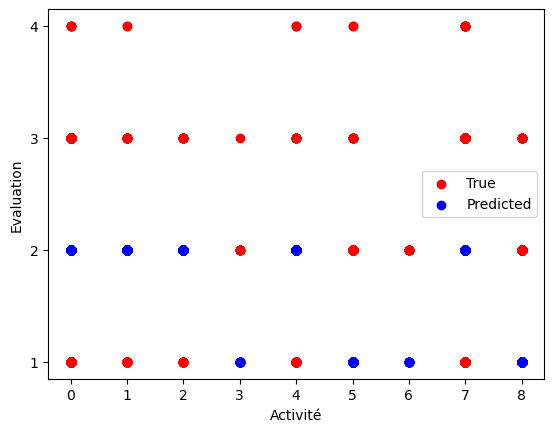

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Charger le dataset
house_data = pd.read_csv('export_alimconfiance@dgal.csv', sep=';')

#définir le nom des colonnes
analysed = "Synthese_eval_sanit"
analysing = "APP_Libelle_activite_etablissement"

# Convertir les évaluations en valeurs numériques
house_data[analysed] = house_data[analysed].apply(eval_to_numeric)
#convertion des activités
house_data[analysing] = house_data[analysing].apply(to_category)

# Encoder la colonne 'APP_Libelle_activite_etablissement' en valeurs numériques
label_encoder = LabelEncoder()
house_data[analysing] = label_encoder.fit_transform(house_data[analysing])

# Séparer les données en fonction des features et de la cible
X = house_data[[analysing]]
y = house_data[analysed]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer l'arbre de décision
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Prédire les évaluations sur l'ensemble de test
y_pred = tree_classifier.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualisation des résultats
plt.xlabel('Activité')
plt.ylabel('Evaluation')
plt.yticks([1, 2, 3, 4])
plt.scatter(X_test, y_test, color='red', label='True')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.legend()
plt.show()
